In [26]:
import random

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Model

RANDOM_SEED = 2_055
IMG_SIZE = (8, 8, 1)

In [27]:
def create_model():
    input_layer = layers.Input(shape=IMG_SIZE)
    layer_conv1_1 = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        input_layer)
    layer_conv1_2 = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv1_1)
    layer_pool1 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv1_2)

    layer_conv2_1 = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_pool1)
    layer_conv2_2 = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv2_1)
    layer_pool2 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv2_2)

    layer_conv3_1 = layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_pool2)
    layer_conv3_2 = layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv3_1)
    layer_flatten = layers.Flatten()(layer_conv3_2)

    dense_hidden1 = layers.Dense(32, activation='relu')(layer_flatten)
    dense_hidden2 = layers.Dense(64, activation='relu')(dense_hidden1)
    dense_hidden3 = layers.Dense(128, activation='relu')(dense_hidden2)

    dense_output = layers.Dense(10, activation='softmax')(dense_hidden3)

    model = Model(inputs=[input_layer], outputs=[dense_output])

    return model

In [28]:
def get_data():
    digit_dataset = load_digits()

    digit_data = digit_dataset.images
    digit_data = np.expand_dims(digit_data, axis=-1)  # Add a third dimension as the image channel
    digit_data = np.divide(digit_data, 255)  # Normalize pixel values from 0-255 to 0-1

    return digit_data, digit_dataset.target

In [29]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)

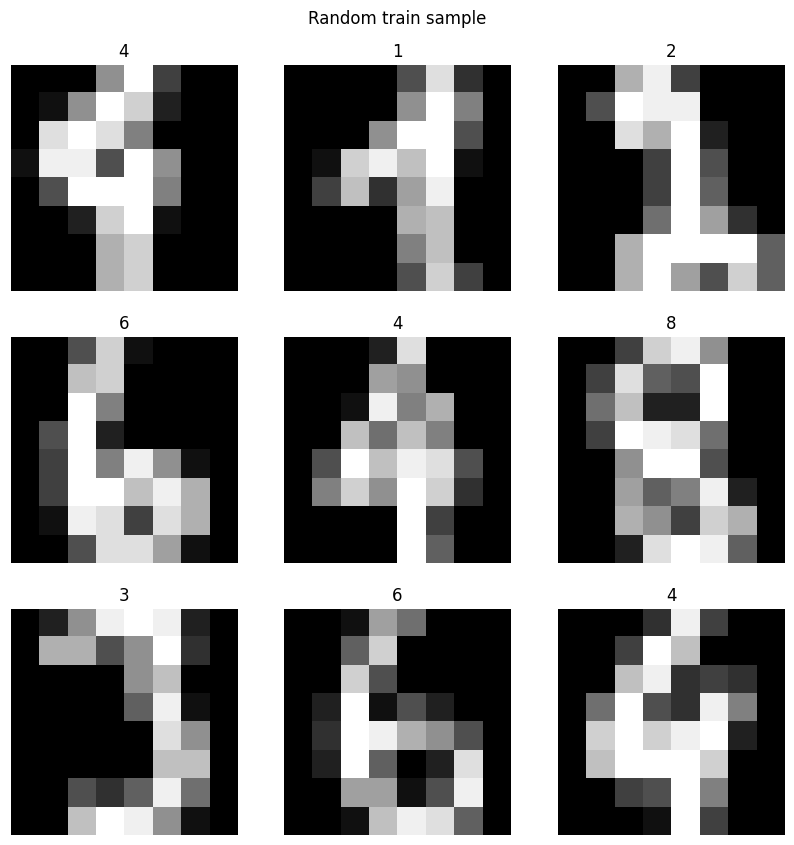

In [30]:
# Check data has been loaded property
plt.figure(figsize=(10, 10))
plt.title("Random train sample", pad=30)
plt.axis("off")

for i in range(9):
    random_num = random.randint(0, X_train.shape[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[random_num], cmap='gray')
    plt.title(y_train[random_num])
    plt.axis("off")

In [31]:
model_base = create_model()
model_base.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='digit_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=True)

history_model_base = model_base.fit(x=X_train,
                                    y=y_train,
                                    epochs=40,
                                    validation_data=(X_test, y_test),
                                    callbacks=[model_checkpoint_callback],
                                    verbose=True)

Epoch 1/40
40/40 [==============================] - ETA: 0s - loss: 2.3038 - accuracy: 0.0971
Epoch 1: val_accuracy improved from -inf to 0.09074, saving model to digit_model.h5


C:\Users\JulianBSL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 8s 144ms/step - loss: 2.3038 - accuracy: 0.0971 - val_loss: 2.3037 - val_accuracy: 0.0907
Epoch 2/40
40/40 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.0851
Epoch 2: val_accuracy improved from 0.09074 to 0.10000, saving model to digit_model.h5
40/40 [==============================] - 5s 128ms/step - loss: 2.3026 - accuracy: 0.0851 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/40
40/40 [==============================] - ETA: 0s - loss: 2.3023 - accuracy: 0.0939
Epoch 3: val_accuracy did not improve from 0.10000
40/40 [==============================] - 5s 124ms/step - loss: 2.3023 - accuracy: 0.0939 - val_loss: 2.3052 - val_accuracy: 0.0944
Epoch 4/40
40/40 [==============================] - ETA: 0s - loss: 2.3021 - accuracy: 0.1034
Epoch 4: val_accuracy did not improve from 0.10000
40/40 [==============================] - 5s 126ms/step - loss: 2.3021 - accuracy: 0.1034 - val_loss: 2.3055 - val_accuracy: 0.0944
Epoch

In [33]:
np.save('./history.npy', history_model_base.history)

In [34]:
# Método para la visualización de la exactitud obtenida durante el proceso de entrenamiento tanto en entrenamiento como en validación
def plot_losses(history):
    plt.plot(history.history['loss'], label="Entrenamiento")
    plt.plot(history.history['val_loss'], label="Validación")
    plt.ylabel('Pérdidas')
    plt.xlabel('Época')
    plt.legend(loc="best")
    plt.title('Pérdidas durante el entrenamiento')


# Método para la visualización de la exactitud obtenida durante el proceso de entrenamiento tanto en entrenamiento como en validación
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label="Entrenamiento")
    plt.plot(history.history['val_accuracy'], label="Validación")
    plt.ylabel('Exactitud')
    plt.xlabel('Época')
    plt.legend(loc="best")
    plt.title('Exactitud durante el entrenamiento')

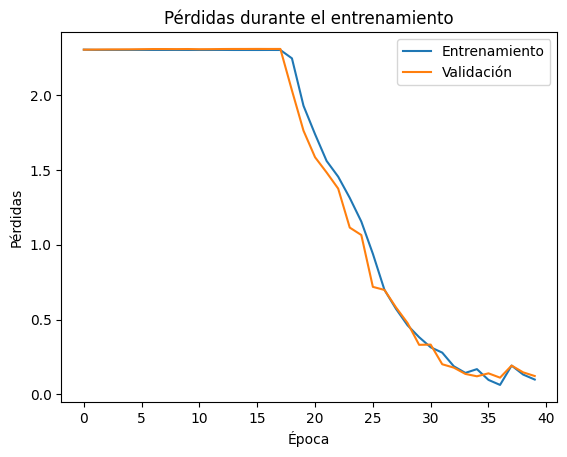

In [35]:
plot_losses(history_model_base)

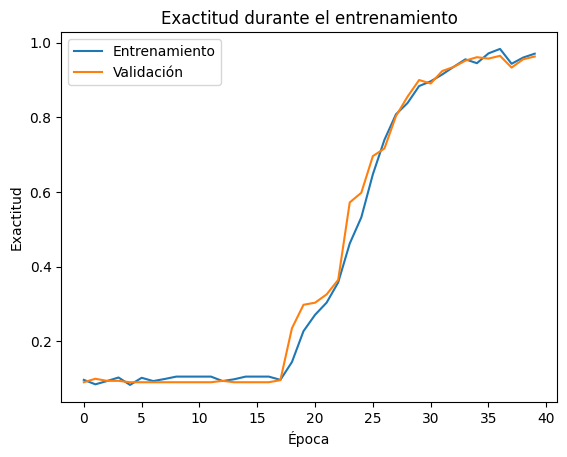

In [36]:
plot_accuracy(history_model_base)